# 14. Web Integration - Web Services

Chapter 14 of Python for Finance (continued)

Hilpisch, Yves. Python for Finance: Analyze Big Financial Data. O'Reilly Media. Kindle Edition.

**Call option formula of Gruenbichler and Longstaff (1996)**

$ \begin{aligned} C(V_0, K, T) = {} & D(T) \cdot [ (e^{-\beta T} \cdot V_0 \cdot Q(\gamma \cdot K | \nu + 4, \lambda) \\
& \frac{\alpha}{\beta} \cdot (1-e^{\beta T}) \cdot Q(\gamma \cdot K| \nu + 2, \lambda) \\
& - K \cdot Q(\gamma \cdot K| \nu , \lambda) ]
\end{aligned}$

$ \begin{aligned} 
& \alpha = \kappa \Theta \\
& \beta = \kappa + \zeta \\
& \gamma = \frac{4 \beta }{\sigma^2(1-e^{- \beta T})} \\
& \nu = \frac{4 \alpha}{\sigma ^2} \\
& \lambda = \gamma \cdot e^{- \beta T} \cdot V
\end{aligned}$



In [1]:
from scipy.stats import ncx2 
import numpy as np

In [2]:
# Semianalytical option pricing formula of GL96 
def calculate_option_value( V0, kappa, theta, sigma, zeta, T, r, K): 
    ''' Calculation of European call option price in GL96 model. 
    Parameters = = = = = = = = = = 
    V0 : float current volatility level 
    kappa : float mean reversion factor 
    theta : float long-run mean of volatility 
    sigma : float volatility of volatility
    zeta  : volatility risk premium
    T     : float, time to maturity
    r     : float, risk free rate
    K     : float, strike price of the option

    Returns:
    ========================
    value : float, npv of the option
    '''

    # Discount factor
    D = np.exp(-r * T) 

    #Variables
    alpha = kappa * theta
    beta = kappa + zeta
    gamma = 4 * beta / (sigma ** 2 * (1-np.exp(-beta*T)))
    nu = 4*alpha/(sigma**2)
    lamb = gamma *np.exp(-beta*T)*V0
    cx1 = 1 - ncx2.cdf(gamma * K, nu + 4, lamb) 
    cx2 = 1 - ncx2.cdf(gamma * K, nu + 2, lamb)
    cx3 = 1 - ncx2.cdf(gamma * K, nu, lamb) 

    # formula for European call price 
    value = D * (np.exp(-beta * T) * V0 * cx1 + (alpha / beta) * (1 - np.exp(-beta * T)) * cx2 - K * cx3) 
    return value

In [3]:
calculate_option_value(25, 2.0, 20, 1.0, 0.0, 1.5, 0.02, 22.5)

0.20293770593386112

In [4]:
from urllib.request import urlopen

In [5]:
url = 'http://localhost:4000/'

In [6]:
print(urlopen(url).read())

b'Missing parameter sigma (volatility of volatility)\nMissing parameter T (time horizon in years)\nMissing parameter theta (long-run mean of volatility)\nMissing parameter K (strike)\nMissing parameter r (risk-free interest rate)\nMissing parameter V0 (current volatility level)\nMissing parameter kappa (mean reversion factor)\nMissing parameter zeta (factor of the expected volatility risk premium)\n'


In [7]:
urlpara = url + 'application?V0=%s&kappa=%s&theta=%s&sigma=%s&zeta=%s&T=%s&r=%s&K=%s'
urlval = urlpara % (25, 2.0, 20, 1.0, 0.0, 1.5, 0.02, 22.5)
urlval

'http://localhost:4000/application?V0=25&kappa=2.0&theta=20&sigma=1.0&zeta=0.0&T=1.5&r=0.02&K=22.5'

In [8]:
print(urlopen(urlval).read())

b'0.202937705934'


In [9]:
%%time 
urlpara = 'http://localhost:4000/application?V0=25&kappa=2.0' 
urlpara += '&theta=25&sigma=1.0&zeta=0.0&T=1&r=0.02&K=%s' 

strikes = np.linspace(20,30,50) 
results = [] 

for K in strikes: 
    results.append(float(urlopen(urlpara % K).read()))

results = np.array(results)

Wall time: 50.4 s


In [10]:
results

array([ 4.91296701,  4.71661296,  4.52120153,  4.32692516,  4.1339945 ,
        3.94264561,  3.75313813,  3.56575972,  3.38079846,  3.19858765,
        3.01946028,  2.8437621 ,  2.67184576,  2.50406508,  2.34078693,
        2.18230495,  2.02898213,  1.88111287,  1.738968  ,  1.60280064,
        1.47281111,  1.34917004,  1.23204859,  1.12141092,  1.01739405,
        0.9199686 ,  0.82907686,  0.74462353,  0.66647327,  0.59445387,
        0.52843174,  0.46798166,  0.41300694,  0.36319553,  0.31824647,
        0.27785656,  0.24171678,  0.20951651,  0.18094732,  0.1557064 ,
        0.1334996 ,  0.11414975,  0.09710449,  0.08234678,  0.06958767,
        0.05859317,  0.04915788,  0.04109348,  0.03422854,  0.02840802])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

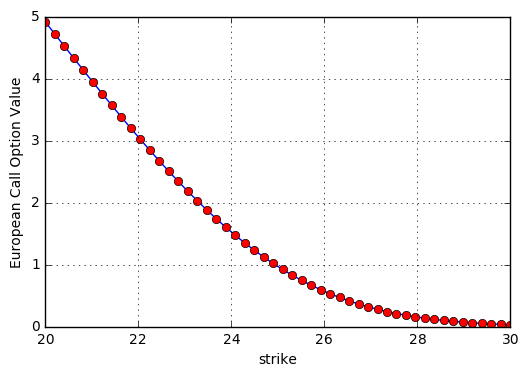

In [12]:
plt.plot(strikes, results, 'b')
plt.plot(strikes, results, 'ro')
plt.grid(True)
plt.xlabel('strike')
plt.ylabel('European Call Option Value')